## 랜덤포레스트

In [0]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import model_selection, svm, metrics

import numpy as np
import pandas as pd

## 결정트리

In [5]:
cancer = load_breast_cancer()
np.random.seed(9)
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target)
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [6]:
print(clf.score(X_test, y_test))

0.916083916083916


In [7]:
X_test.shape

(143, 30)

In [8]:
clf.feature_importances_

array([0.        , 0.04171972, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.04264716, 0.01140527, 0.        ,
       0.        , 0.        , 0.        , 0.01721595, 0.00238546,
       0.01204155, 0.        , 0.        , 0.        , 0.        ,
       0.01718842, 0.03963949, 0.69468863, 0.        , 0.        ,
       0.        , 0.        , 0.12106833, 0.        , 0.        ])

In [9]:
# 결정 트리를 사용한 경우의 중요 변수

list(zip(cancer.feature_names, clf.feature_importances_.round(4)))[:10]

[('mean radius', 0.0),
 ('mean texture', 0.0417),
 ('mean perimeter', 0.0),
 ('mean area', 0.0),
 ('mean smoothness', 0.0),
 ('mean compactness', 0.0),
 ('mean concavity', 0.0),
 ('mean concave points', 0.0426),
 ('mean symmetry', 0.0114),
 ('mean fractal dimension', 0.0)]

In [10]:
df = pd.DataFrame({'feature':cancer.feature_names,'importance':clf.feature_importances_ })
df=df.sort_values('importance', ascending=False)
print(df.head(10))

                 feature  importance
22       worst perimeter    0.694689
27  worst concave points    0.121068
7    mean concave points    0.042647
1           mean texture    0.041720
21         worst texture    0.039639
13            area error    0.017216
20          worst radius    0.017188
15     compactness error    0.012042
8          mean symmetry    0.011405
14      smoothness error    0.002385


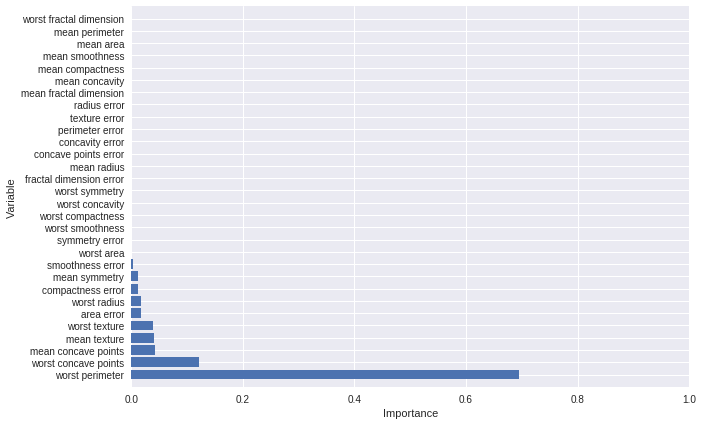

In [11]:
x = df.feature
y = df.importance
ypos = np.arange(len(x))

plt.figure(figsize=(10,7))
plt.barh(x, y)
plt.yticks(ypos, x)
plt.xlabel('Importance')
plt.ylabel('Variable')
plt.xlim(0, 1)
plt.ylim(-1, len(x))
plt.show()

n= 10 feature= 0.1 0.9440559440559441
n= 10 feature= 0.5 0.951048951048951
n= 10 feature= 0.9 0.965034965034965
n= 100 feature= 0.1 0.9440559440559441
n= 100 feature= 0.5 0.958041958041958
n= 100 feature= 0.9 0.9440559440559441
n= 500 feature= 0.1 0.951048951048951
n= 500 feature= 0.5 0.958041958041958
n= 500 feature= 0.9 0.958041958041958


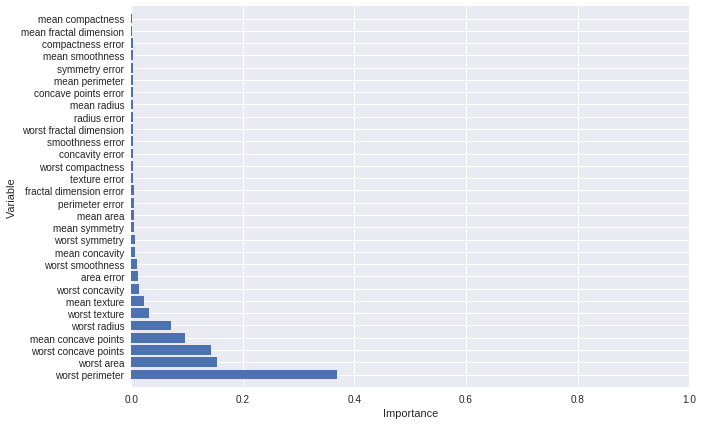

In [38]:
# 랜덤 포레스트를 사용한 경우의 중요 특성

#rfc = RandomForestClassifier(n_estimators=500)
for n in [10,100,500]:
  for f in [0.1, 0.5, 0.9]:
    rfc = RandomForestClassifier(n_estimators= n, max_features= f)
    rfc.fit(X_train, y_train)
    print('n=', n, 'feature=', f, rfc.score(X_test, y_test))

df = pd.DataFrame({'feature':cancer.feature_names,'importance':rfc.feature_importances_ })
df=df.sort_values('importance', ascending=False)
x = df.feature
y = df.importance
ypos = np.arange(len(x))

plt.figure(figsize=(10,7))
plt.barh(x, y)
plt.yticks(ypos, x)
plt.xlabel('Importance')
plt.ylabel('Variable')
plt.xlim(0, 1)
plt.ylim(-1, len(x))
plt.show()

## 그리드 서치
### SMV과 비교

In [0]:
#그리드 서치의 매개변수를 설정한다(C, gamma)
params = [{"C": [1,10,100,1000], "kernel":["linear"]},
    {"C": [1,10,100,1000], "kernel":["rbf"], "gamma":[0.001, 0.0001]}]

#그리드 서치 실행
clf = GridSearchCV(svm.SVC(), params, n_jobs=-1 )
clf.fit(X_train, y_train)
print('최적값 :', clf.best_estimator_)
print('최적 score :', clf.best_score_)

#테스트 데이터로 최종 평가
score = clf.score(X_test, y_test)
print('최종 평가 =',score)

최적값 : SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
최적 score : 0.9507042253521126
최종 평가 = 0.965034965034965
